In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
dataset = fetch_ucirepo(id=69)

# Extract features and target labels
X = dataset.data.features  # DNA sequences
y = dataset.data.targets   # Labels (EI, IE, N)

# Display metadata and variables information
print(dataset.metadata)
print(dataset.variables)


{'uci_id': 69, 'name': 'Molecular Biology (Splice-junction Gene Sequences)', 'repository_url': 'https://archive.ics.uci.edu/dataset/69/molecular+biology+splice+junction+gene+sequences', 'data_url': 'https://archive.ics.uci.edu/static/public/69/data.csv', 'abstract': 'Primate splice-junction gene sequences (DNA) with associated imperfect domain theory', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Sequential', 'Domain-Theory'], 'num_instances': 3190, 'num_features': 60, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': ['instancename'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5M888', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Problem Description: \r\n      \r\nSplice junctions are points on a DNA sequence at which `superfluous\' DNA is removed during the process of protein creation in

In [3]:
import pandas as pd
import numpy as np

# Convert to Pandas DataFrame
df = pd.concat([X, y], axis=1)

# Display dataset
df.head()


,Base1,Base2,Base3,Base4,Base5,Base6,Base7,Base8,Base9,Base10,...,Base52,Base53,Base54,Base55,Base56,Base57,Base58,Base59,Base60,class
0,C,C,A,G,C,T,G,C,A,T,...,G,C,C,A,G,T,C,T,G,EI
1,A,G,A,C,C,C,G,C,C,G,...,T,G,C,C,C,C,C,G,C,EI
2,G,A,G,G,T,G,A,A,G,G,...,A,C,G,G,G,G,A,T,G,EI
3,G,G,G,C,T,G,C,G,T,T,...,G,T,T,T,T,C,C,C,C,EI
4,G,C,T,C,A,G,C,C,C,C,...,C,T,T,G,A,C,C,C,T,EI


In [4]:
# Find all unique characters in the DNA sequences
unique_chars = set("".join(X.iloc[:, 0]))
print("Unique Characters in DNA Sequences:", unique_chars)


Unique Characters in DNA Sequences: {'G', 'D', 'C', 'T', 'A'}


In [5]:
print(y.head())  # Check the first few rows
print(y.columns)  # Check column names


  class
0    EI
1    EI
2    EI
3    EI
4    EI
Index(['class'], dtype='object')


In [6]:
y = y.iloc[:, 0]  # Extract first column if it's the only one
print("Unique Labels in y:", y.unique())  # Now check unique labels


Unique Labels in y: ['EI' 'IE' 'N']


In [7]:
# Define label mapping
label_mapping = {'EI': 0, 'IE': 1, 'N': 2}

# Convert labels into numeric values
y_encoded = np.array([label_mapping[label] for label in y])

# Check the first few encoded labels
print("Encoded Labels:", y_encoded[:10])


Encoded Labels: [0 0 0 0 0 0 0 0 0 0]


In [8]:
import numpy as np

# Define nucleotide mapping including 'D'
nucleotide_mapping = {
    'A': [1, 0, 0, 0],
    'T': [0, 1, 0, 0],
    'C': [0, 0, 1, 0],
    'G': [0, 0, 0, 1],
    'D': [0.33, 0.33, 0, 0.33]  # 'D' can be A, G, or T (probabilistic encoding)
}


In [9]:
# Function to one-hot encode a DNA sequence
def one_hot_encode_sequence(sequence):
    encoded_sequence = [nucleotide_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence]
    return np.array(encoded_sequence).flatten()  # Flatten to 1D vector

# Apply one-hot encoding to all DNA sequences
X_encoded = np.array([one_hot_encode_sequence(seq) for seq in X.iloc[:, 0]])

# Check shape
print(f"Encoded Data Shape: {X_encoded.shape}")


Encoded Data Shape: (3190, 4)


In [10]:
import numpy as np

# Define nucleotide mapping including 'D'
nucleotide_mapping = {
    'A': [1, 0, 0, 0],
    'T': [0, 1, 0, 0],
    'C': [0, 0, 1, 0],
    'G': [0, 0, 0, 1],
    'D': [0.33, 0.33, 0, 0.33]  # 'D' can be A, G, or T (probabilistic encoding)
}

# Function to one-hot encode a DNA sequence
def one_hot_encode_sequence(sequence):
    encoded_sequence = np.array([nucleotide_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence])  # Shape (60, 4)
    return encoded_sequence.flatten()  # Flatten to (240,)

# Convert sequences into NumPy array (Ensuring correct shape)
X_encoded = np.stack([one_hot_encode_sequence(seq) for seq in X.iloc[:, 0]])

# Check the correct shape
print(f"Encoded Data Shape: {X_encoded.shape}")  # Expected shape: (3190, 240)


Encoded Data Shape: (3190, 4)


In [11]:
# Print column names of X
print("X columns:", X.columns)

# Print the first few rows of X to verify structure
print("Sample of X:\n", X.head())

# If X has multiple columns, specify the correct one manually


X columns: Index(['Base1', 'Base2', 'Base3', 'Base4', 'Base5', 'Base6', 'Base7', 'Base8',
       'Base9', 'Base10', 'Base11', 'Base12', 'Base13', 'Base14', 'Base15',
       'Base16', 'Base17', 'Base18', 'Base19', 'Base20', 'Base21', 'Base22',
       'Base23', 'Base24', 'Base25', 'Base26', 'Base27', 'Base28', 'Base29',
       'Base30', 'Base31', 'Base32', 'Base33', 'Base34', 'Base35', 'Base36',
       'Base37', 'Base38', 'Base39', 'Base40', 'Base41', 'Base42', 'Base43',
       'Base44', 'Base45', 'Base46', 'Base47', 'Base48', 'Base49', 'Base50',
       'Base51', 'Base52', 'Base53', 'Base54', 'Base55', 'Base56', 'Base57',
       'Base58', 'Base59', 'Base60'],
      dtype='object')
Sample of X:
   Base1 Base2 Base3 Base4 Base5 Base6 Base7 Base8 Base9 Base10  ... Base51  \
0     C     C     A     G     C     T     G     C     A      T  ...      A   
1     A     G     A     C     C     C     G     C     C      G  ...      G   
2     G     A     G     G     T     G     A     A     G      G  

In [12]:
import numpy as np

# Define nucleotide mapping including 'D'
nucleotide_mapping = {
    'A': [1, 0, 0, 0],
    'T': [0, 1, 0, 0],
    'C': [0, 0, 1, 0],
    'G': [0, 0, 0, 1],
    'D': [0.33, 0.33, 0, 0.33]  # 'D' can be A, G, or T (probabilistic encoding)
}

# Function to one-hot encode a DNA sequence
def one_hot_encode_sequence(sequence):
    encoded_sequence = np.array([nucleotide_mapping.get(nuc, [0, 0, 0, 0]) for nuc in sequence])  # Shape (60, 4)
    return encoded_sequence.flatten()  # Flatten to (240,)

# **NEW: Combine all 60 columns into a single sequence per row**
X_sequences = X.astype(str).agg(''.join, axis=1)  # Convert all columns to strings and join them

# Apply encoding to the correct sequence column
X_encoded = np.stack([one_hot_encode_sequence(seq) for seq in X_sequences])

# Check the new shape
print(f"Encoded Data Shape: {X_encoded.shape}")  # Expected output: (3190, 240)


Encoded Data Shape: (3190, 240)


In [13]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Display shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (2552, 240)
Testing Data Shape: (638, 240)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)


In [15]:
# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Logistic Regression Results:
Accuracy: 0.9404
Precision: 0.9415
Recall: 0.9404
F1-score: 0.9407


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [17]:
# Compute performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Display results
print(f"Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")


Random Forest Results:
Accuracy: 0.9655
Precision: 0.9661
Recall: 0.9655
F1-score: 0.9656


In [18]:
from sklearn.neural_network import MLPClassifier

# Initialize Neural Network (MLP Classifier)
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)


In [19]:
# Compute performance metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

# Display results
print(f"Neural Network Results:")
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1-score: {f1_mlp:.4f}")

Neural Network Results:
Accuracy: 0.9467
Precision: 0.9479
Recall: 0.9467
F1-score: 0.9471


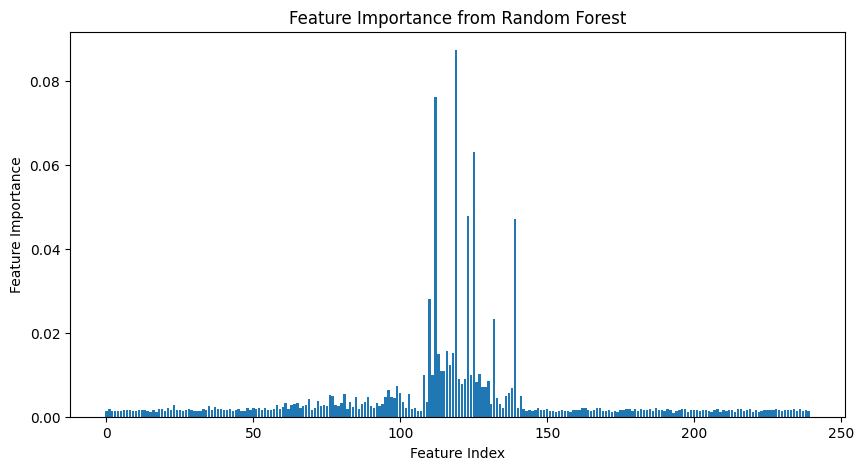

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()


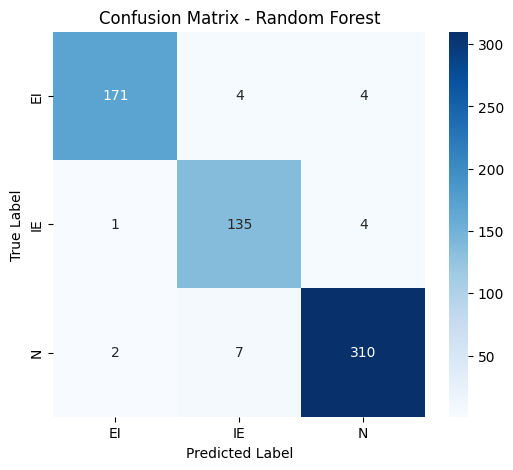

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["EI", "IE", "N"], yticklabels=["EI", "IE", "N"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [10, 20, None],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]    # Minimum samples required to split a node
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a new Random Forest with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf_opt = best_rf.predict(X_test)

# Evaluate optimized Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
precision_rf_opt = precision_score(y_test, y_pred_rf_opt, average='weighted')
recall_rf_opt = recall_score(y_test, y_pred_rf_opt, average='weighted')
f1_rf_opt = f1_score(y_test, y_pred_rf_opt, average='weighted')

# Display new results
print("\nOptimized Random Forest Results:")
print(f"Accuracy: {accuracy_rf_opt:.4f}")
print(f"Precision: {precision_rf_opt:.4f}")
print(f"Recall: {recall_rf_opt:.4f}")
print(f"F1-score: {f1_rf_opt:.4f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

Optimized Random Forest Results:
Accuracy: 0.9655
Precision: 0.9663
Recall: 0.9655
F1-score: 0.9657


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a Deep Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(240,)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(3, activation='softmax')  # Output layer (3 classes: EI, IE, N)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Deep Learning Model Accuracy: {test_acc:.4f}")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6239 - loss: 0.8039 - val_accuracy: 0.9248 - val_loss: 0.1986
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9600 - loss: 0.1387 - val_accuracy: 0.9451 - val_loss: 0.1517
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0851 - val_accuracy: 0.9483 - val_loss: 0.1530
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0482 - val_accuracy: 0.9483 - val_loss: 0.1672
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9952 - loss: 0.0307 - val_accuracy: 0.9530 - val_loss: 0.1757
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9973 - loss: 0.0167 - val_accuracy: 0.9467 - val_loss: 0.1752
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.0083 - val_accuracy: 0.9498 - val_loss: 0.1826
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9514 - val_loss: 0.2112
Epo

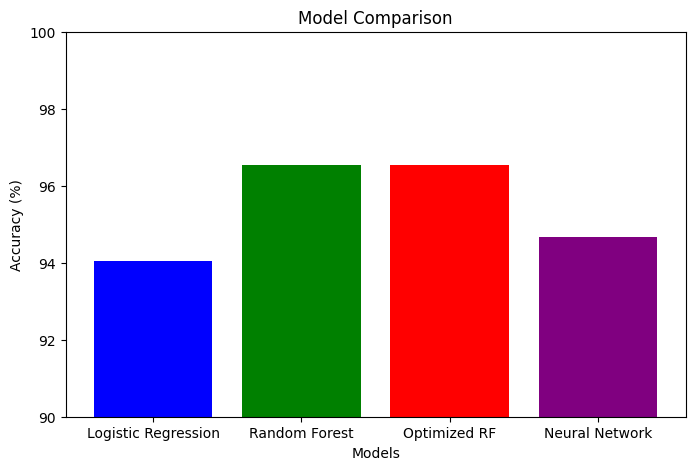

In [24]:
import matplotlib.pyplot as plt

# Define model names and their accuracy scores
models = ["Logistic Regression", "Random Forest", "Optimized RF", "Neural Network"]
accuracy_scores = [94.04, 96.55, 96.55, 94.67]

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.ylim(90, 100)  # Set y-axis limit for better visualization
plt.show()


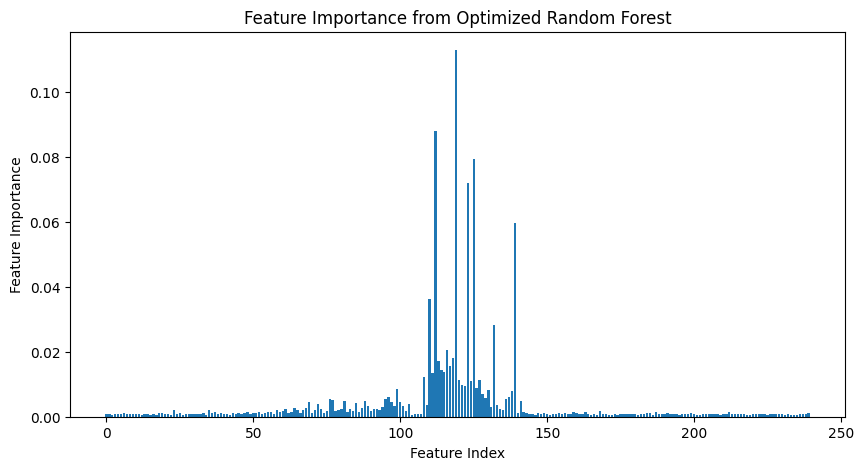

In [25]:
# Feature importance plot for Random Forest
import numpy as np

# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Create a plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance from Optimized Random Forest")
plt.show()


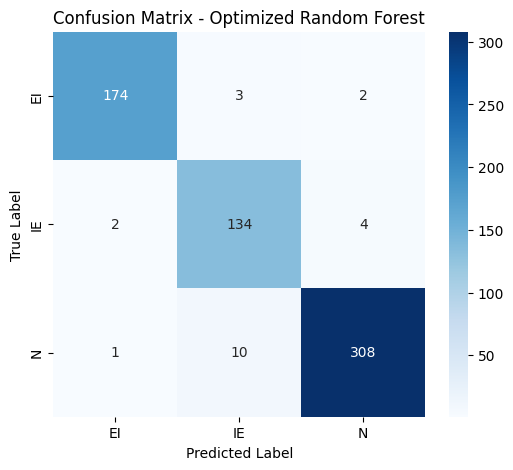

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_opt)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["EI", "IE", "N"], yticklabels=["EI", "IE", "N"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Random Forest")
plt.show()


In [27]:
import pandas as pd

# Create a DataFrame with model performance results
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Optimized RF", "Neural Network"],
    "Accuracy": [94.04, 96.55, 96.55, 94.67],
    "Precision": [94.15, 96.61, 96.63, 94.79],
    "Recall": [94.04, 96.55, 96.55, 94.67],
    "F1-score": [94.07, 96.56, 96.57, 94.71]
})

# Save as CSV
model_performance.to_csv("model_performance.csv", index=False)

print("Model performance exported")

Model performance exported


In [28]:
from sklearn.model_selection import train_test_split

# Ensure X_encoded and y_encoded exist
if 'X_encoded' not in locals() or 'y_encoded' not in locals():
    print("Error: X_encoded or y_encoded is not found. Ensure your preprocessing is run before this step.")

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (2552, 240)
Testing Data Shape: (638, 240)
